In [152]:
import torch

In [153]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Create some toy data

In [163]:
from sklearn import linear_model, datasets

# import some data to play with
iris = datasets.load_iris()
x_train = iris.data[:, :2].astype(np.float32)  # we only take the first two features.
y_train = iris.target.astype(np.int64)

In [164]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [108]:
model = torch.nn.Linear(2,3)

In [109]:
loss_fn = torch.nn.CrossEntropyLoss()

In [110]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

In [123]:
y_pred_prob = model(torch.from_numpy(x_train))

In [112]:
optimizer.zero_grad()

In [113]:
loss = loss_fn(y_pred, torch.from_numpy(y_train))

In [114]:
type(torch.from_numpy(y_train))

torch.Tensor

In [115]:
loss

tensor(2.2657)

In [116]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1544, -0.4448],
         [-0.1733, -0.4472],
         [ 0.6109, -0.6033]]), Parameter containing:
 tensor([-0.1872,  0.5446,  0.4740])]

In [117]:
loss.backward()

In [118]:
optimizer.step()

In [119]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1545, -0.4447],
         [-0.1731, -0.4471],
         [ 0.6105, -0.6035]]), Parameter containing:
 tensor([-0.1872,  0.5446,  0.4740])]

In [127]:
_, y_pred = torch.max(y_pred_prob.data, 1)

In [132]:
len(y_pred)

150

In [133]:
correct = (y_pred.data.numpy() == y_train).sum()

In [134]:
correct


50

In [175]:
model = torch.nn.Linear(2,3)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

In [176]:
for epoch in range(10000):
    y_pred_prob = model(torch.from_numpy(x_train))
    optimizer.zero_grad()
    loss = loss_fn(y_pred_prob, torch.from_numpy(y_train))
    loss.backward()
    optimizer.step()
    if epoch%100==0:
        print(f'loss:{loss}')

loss:3.30024790763855
loss:3.069474935531616
loss:2.8544230461120605
loss:2.6586525440216064
loss:2.484785318374634
loss:2.3336946964263916
loss:2.2042295932769775
loss:2.093595504760742
loss:1.9982008934020996
loss:1.9144713878631592
loss:1.839375615119934
loss:1.770595908164978
loss:1.7064998149871826
loss:1.646016240119934
loss:1.5884978771209717
loss:1.5335994958877563
loss:1.481189489364624
loss:1.4312745332717896
loss:1.3839542865753174
loss:1.3393785953521729
loss:1.2977182865142822
loss:1.259137749671936
loss:1.2237688302993774
loss:1.1917003393173218
loss:1.162958025932312
loss:1.1375000476837158
loss:1.115219235420227
loss:1.0959433317184448
loss:1.0794521570205688
loss:1.0654875040054321
loss:1.0537723302841187
loss:1.044021487236023
loss:1.0359591245651245
loss:1.0293248891830444
loss:1.0238819122314453
loss:1.0194212198257446
loss:1.0157612562179565
loss:1.0127476453781128
loss:1.0102519989013672
loss:1.0081675052642822
loss:1.0064082145690918
loss:1.0049045085906982
loss:

In [177]:
x_min, x_max = x_train[:, 0].min() - .5, x_train[:, 0].max() + .5
y_min, y_max = x_train[:, 1].min() - .5, x_train[:, 1].max() + .5

In [178]:
y_pred_prob = model(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()].astype(np.float32)))

In [179]:
_, y_pred = torch.max(y_pred_prob.data, 1)

In [180]:
Z = y_pred.data.numpy()

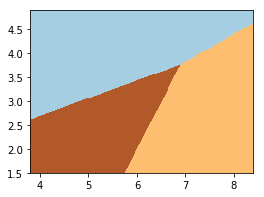

In [181]:
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

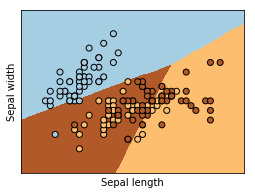

In [182]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()